In [2]:
import wbdata            
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
import lightgbm 
import sklearn

In [3]:
class DataScraper():
    @staticmethod
    def get_values(indicator, country='all'):
        indicator_list = [(x['value'], int(x['date'])) for x in wbdata.get_data(indicator, country=country) if x['value'] is not None]
        df = pd.DataFrame(indicator_list, columns=['value', 'date'])
        df.sort_index(ascending=False, inplace=True)
        return df
    
    def get_all_values(indicator, country='all'):
        indicator_list = [(x['value'], int(x['date'])) for x in wbdata.get_data(indicator, country=country)]
        df = pd.DataFrame(indicator_list, columns=['value', 'date'])
        df.sort_index(ascending=False, inplace=True)
        return df

    @staticmethod
    def plot_values(indicator_df, x, y):
        """
        Plots the values of the given indicator list
        :param indicator_df: df of indicators to plot, value and year
        """
        sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
        sns.lineplot(data=indicator_df, x=x, y=y)
        

class CodeHandler():
    @staticmethod
    def get_cause_codes(description: str):
        return wbdata.search_indicators(description)

    @staticmethod
    def get_country_codes(country: str):
        return wbdata.search_countries(country)
    
    def get_specific_entry(cause_description: str, index: int):
        return wbdata.search_indicators(cause_description)[index]
    
    



class CauseCodes():
    wage_female = "SL.EMP.WORK.FE.ZS"
    wage_male = "SL.EMP.WORK.MA.ZS"
    intentional_homicide_female = "VC.IHR.PSRC.FE.P5"
    intentional_homicide_male = "VC.IHR.PSRC.MA.P5"
    domestic_work_female = "SG.TIM.UWRK.FE"
    domestic_work_male = "SG.TIM.UWRK.MA"
    sexual_violence_15 = "SG.VAW.SX15.ZS"
    sexual_violence_18 = "SG.VAW.SX18.ZS"
    sexual_violence_22 = "SG.VAW.SX22.ZS"
    knowledge_contraceptions_female = "SH.FPL.KNMD.AL.FE.ZS"
    knowledge_contraceptions_male = "SH.FPL.KNMD.AL.MA.ZS"

        

In [4]:
wbdata.get_source()
wbdata.get_indicator(source=14)
wbdata.get_data("IC.BUS.EASE.XQ", country="USA")

[{'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2022',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2021',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2020',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'coun

In [5]:
wbdata.get_indicator(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [6]:
wbdata.search_countries("Netherlands")

id    name
----  -----------
NLD   Netherlands

In [7]:
wbdata.get_data("VC.IHR.PSRC.FE.P5", country="NLD")

[{'indicator': {'id': 'VC.IHR.PSRC.FE.P5',
   'value': 'Intentional homicides, female (per 100,000 female)'},
  'country': {'id': 'NL', 'value': 'Netherlands'},
  'countryiso3code': 'NLD',
  'date': '2022',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'VC.IHR.PSRC.FE.P5',
   'value': 'Intentional homicides, female (per 100,000 female)'},
  'country': {'id': 'NL', 'value': 'Netherlands'},
  'countryiso3code': 'NLD',
  'date': '2021',
  'value': 0.420206408795079,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'VC.IHR.PSRC.FE.P5',
   'value': 'Intentional homicides, female (per 100,000 female)'},
  'country': {'id': 'NL', 'value': 'Netherlands'},
  'countryiso3code': 'NLD',
  'date': '2020',
  'value': 0.501559879723661,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'VC.IHR.PSRC.FE.P5',
   'value': 'Intentional homicides, female (per 100,000 female)'},
  'country': {'id': 'NL', 'value': 'Net

In [8]:
homicide_df = DataScraper.get_values(indicator="VC.IHR.PSRC.FE.P5", country="NLD")

In [9]:
DataScraper.get_all_values(indicator="VC.IHR.PSRC.FE.P5", country="NLD")

,value,date
62,NaN,1960
61,NaN,1961
60,NaN,1962
59,NaN,1963
58,NaN,1964
...,...,...
4,0.413629,2018
3,0.480604,2019
2,0.501560,2020
1,0.420206,2021


In [10]:
# Intentional homicides, female (per 100,000 female)
df = DataScraper.get_values(indicator="VC.IHR.PSRC.FE.P5", country="NLD")


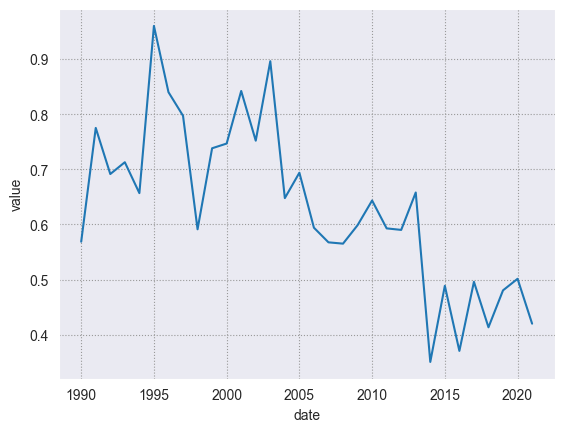

In [11]:
DataScraper.plot_values(df, "date", "value")

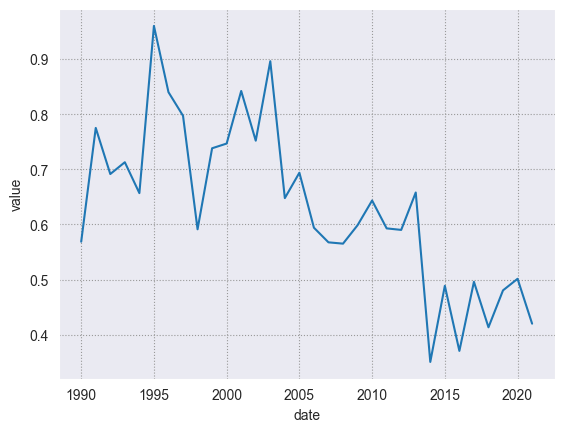

In [12]:
# Intentional homicides, female (per 100,000 female)
df = DataScraper.get_values(indicator="VC.IHR.PSRC.FE.P5", country="NLD")
DataScraper.plot_values(df, "date", "value")

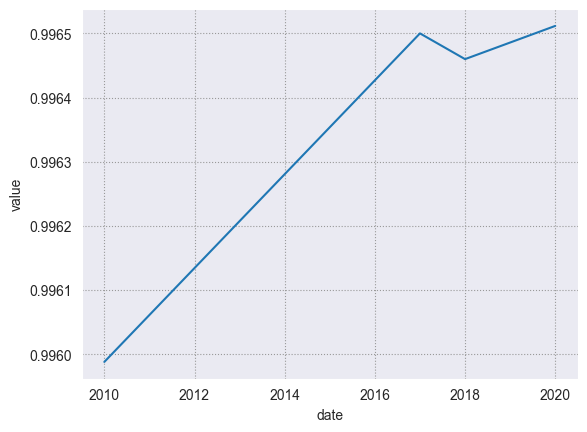

In [13]:
# Probability of Survival to Age 5, Female
df = DataScraper.get_values(indicator="HD.HCI.MORT.FE", country="NLD")
DataScraper.plot_values(df, "date", "value")

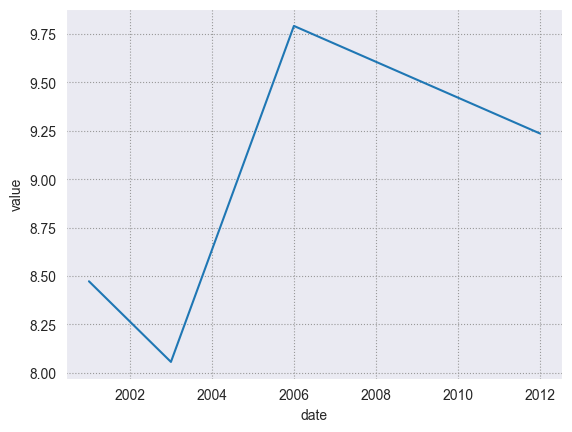

In [14]:
# Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)
df = DataScraper.get_values(indicator="SG.TIM.UWRK.MA", country="NLD")
DataScraper.plot_values(df, "date", "value")

In [15]:
df = DataScraper.get_values(indicator="SG.TIM.UWRK.MA", country="NLD")

In [16]:
df

,value,date
3,8.47222,2001
2,8.05556,2003
1,9.79167,2006
0,9.23611,2012


In [17]:
# Intentional homicides, female (per 100,000 female)
df = DataScraper.get_values(indicator=CauseCodes.intentional_homicide_female, country="NLD")
result = seasonal_decompose(df.value, model='additive', period=1)

TypeError: float() argument must be a string or a number, not 'Figure'

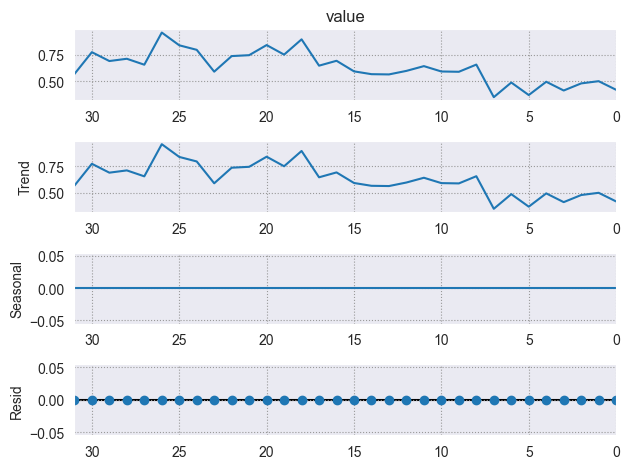

In [18]:
plt.plot(result.plot())

In [79]:
x_train, y_train = np.array(df.date[:int(0.92*(len(df.date)))]).reshape(-1, 1), np.array(df.value[:int(0.92*(len(df.value)))]).reshape(-1, 1)
#x_val, y_val = np.array(df.date[int(0.7*(len(df.date))):int(0.92*(len(df.date)))]).reshape(-1, 1), np.array(df.value[int(0.7*(len(df.value))):int(0.92*(len(df.value)))]).reshape(-1, 1)
x_test, y_test = np.array(df.date[int(0.92*(len(df.date))):]).reshape(-1, 1), np.array(df.value[int(0.92*(len(df.value))):]).reshape(-1, 1)


In [80]:
from sklearn import svm

In [112]:
def train_model(x_train, y_train):
    model = svm.SVR(kernel="linear")
    model.fit(x_train, y_train)
    return model

In [113]:
model = train_model(x_train, y_train)

/Users/Tildi/opt/anaconda3/envs/datascraping/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
model.predict(x_test)
mae = sklearn.metrics.mean_squared_error(y_test, model.predict(x_test))
predictions = model.predict(x_test)

In [117]:
#plot reality vs prediction for the last week of the dataset

def plot_pred_real(x_test, y_test, predictions):
    fig = plt.figure(figsize=(16,8))
    plt.title(f'Real vs Prediction - MAE {mae}', fontsize=20)
    plt.plot(x_test, y_test, color='red')
    plt.plot(x_test, predictions, color='green')
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Number of homicides', fontsize=16)
    plt.legend(labels=['Real', 'Prediction'], fontsize=16)
    plt.grid()
    plt.show()

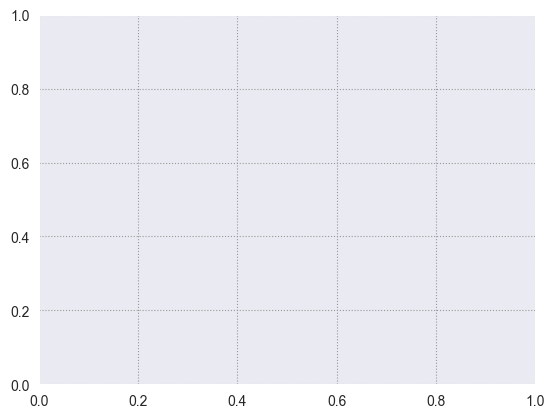

In [123]:
df = DataScraper.get_values(indicator=CauseCodes.sexual_violence_15, country="USA")
DataScraper.plot_values(df, "date", "value")

In [124]:
df

,value,date
